# Model validation currents

Note: this notebook requires the model output data

<div class="alert alert-warning" role="alert">
  <strong>⚠️ Important Disclaimer</strong><br><br>
  This model setup is a <strong>simplified version</strong> of a detailed model developed by DHI. It does <strong>not</strong> resolve fine-scale processes and is <strong>not calibrated</strong> for operational use. Use is limited to <strong>educational and research purposes only</strong> — results should <strong>not</strong> inform decision-making. Performance shown here does <strong>not</strong> represent that of DHI’s high-resolution models.
</div>

### Import packages

In [1]:
import modelskill as ms
import matplotlib.pyplot as plt
import helper as h
import plotting as pl
import pandas as pd
from pathlib import Path

### Define paths

In [17]:
obs_fldr = "../observations/" 
mr_fldr = "../output/"    
#mr_fldr = "../output_sample/"     # use this if you have not downloaded the full data from Zenodo yet
mr_fn = f"{mr_fldr}Area.dfsu"

In [18]:
# Load observation data
swhlist = h.get_swh_point_obs(station_file="subset_stations.csv")
tplist = h.get_tp_point_obs(station_file="subset_stations.csv")
mdirlist = h.get_mdir_point_obs(station_file="stations.csv")


In [19]:
# Load MIKE21 simulation data
mr_swh = ms.DfsuModelResult(mr_fn, name="MIKE21", item=0)
mr_tp = ms.DfsuModelResult(mr_fn, name="MIKE21", item=1)
mr_dir = ms.DfsuModelResult(mr_fn, name="MIKE21", item=3)
mr_dir

<DfsuModelResult>: MIKE21
Time: 2022-01-01 00:00:00 - 2022-12-31 23:00:00
Quantity: Mean Wave Direction [degree]

### Create modelskill comparer collection

In [20]:
# swh 
cmps = []
for o in swhlist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_swh))
    except Exception as e:
        print(f"Skipping {o.name} due to error: {e}")

cc_swh = ms.ComparerCollection(cmps)

In [21]:
# tp
cmps = []
for o in tplist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_tp))
    except Exception as e:
        print(f"Skipping {o.name} due to error: {e}")
        
cc_tp = ms.ComparerCollection(cmps)

In [22]:
# mdir
cmps = []
for o in mdirlist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_dir))
    except Exception as e:
        print(f"Skipping {o.name} due to error: {e}")
        
cc_dir = ms.ComparerCollection(cmps)

## Skill tables

In [23]:
# Print statistics for the swh-component
cc_swh.skill().round(3)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
Europlatform2,51280,0.140,0.307,0.273,0.206,0.962,0.234,0.842
IJmuidenMunitiestort_,49804,0.087,0.258,0.243,0.177,0.965,0.194,0.908
J61,52187,0.140,0.326,0.294,0.233,0.960,0.199,0.877
K13a_,48749,0.106,0.290,0.270,0.206,0.963,0.187,0.898
WesthinderBuoy,17459,0.093,0.254,0.237,0.174,0.954,0.231,0.844


In [24]:
# Print statistics for the tp-component
cc_tp.skill().round(3)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
Europlatform2,51277,0.845,2.510,2.364,1.309,0.498,0.404,-0.800
IJmuidenMunitiestort_,49802,0.640,2.269,2.176,1.209,0.688,0.332,0.212
J61,52185,0.337,1.981,1.952,1.000,0.697,0.284,0.275
K13a_,48747,0.485,2.136,2.080,1.097,0.640,0.312,0.038


In [25]:
# Print statistics for the mdir-component
cc_dir.skill().round(3)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
IJmuidenMunitiestort_,49802,-5.608,69.879,69.654,25.652,0.797,0.293,0.574
WaddenEierlandseGat,45187,-5.213,71.479,71.289,26.525,0.802,0.312,0.604


## Scatter plots

### Significant wave height

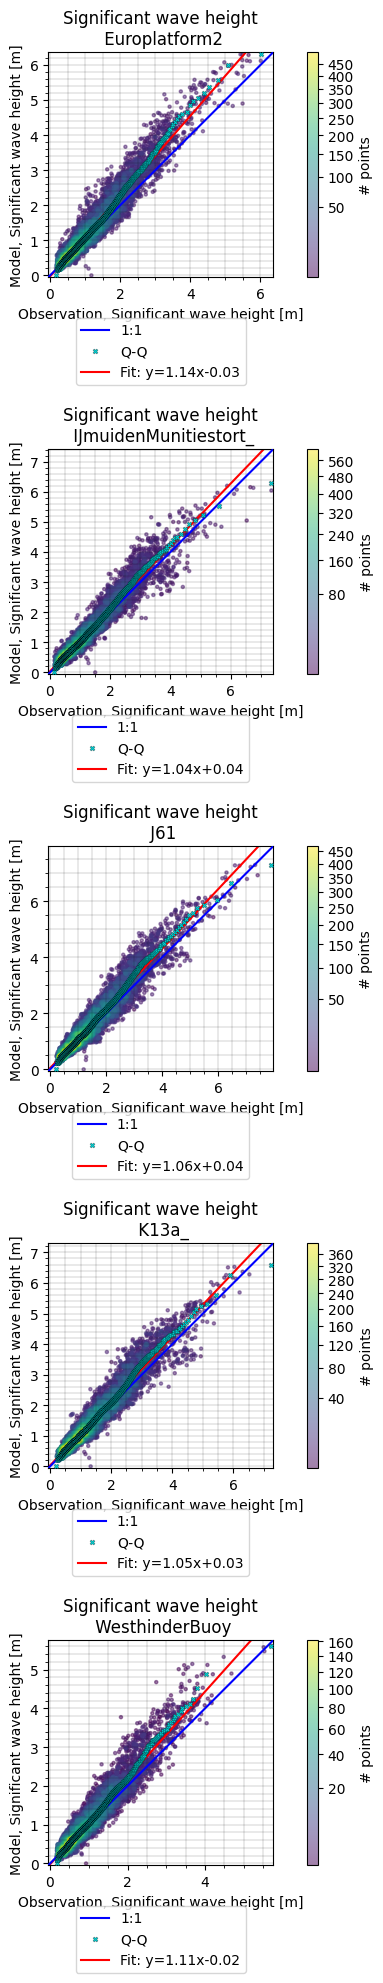

In [26]:
# Plot 
pl.plot_scatter_cc(cc = cc_swh, title='Significant wave height')


<div class="alert alert-warning" role="alert">
  <strong>⚠️ Important Disclaimer</strong><br><br>
  This model setup is a <strong>simplified version</strong> of a detailed model developed by DHI. It does <strong>not</strong> resolve fine-scale processes and is <strong>not calibrated</strong> for operational use. Use is limited to <strong>educational and research purposes only</strong> — results should <strong>not</strong> inform decision-making. Performance shown here does <strong>not</strong> represent that of DHI’s high-resolution models.
</div>

### Peak wave period

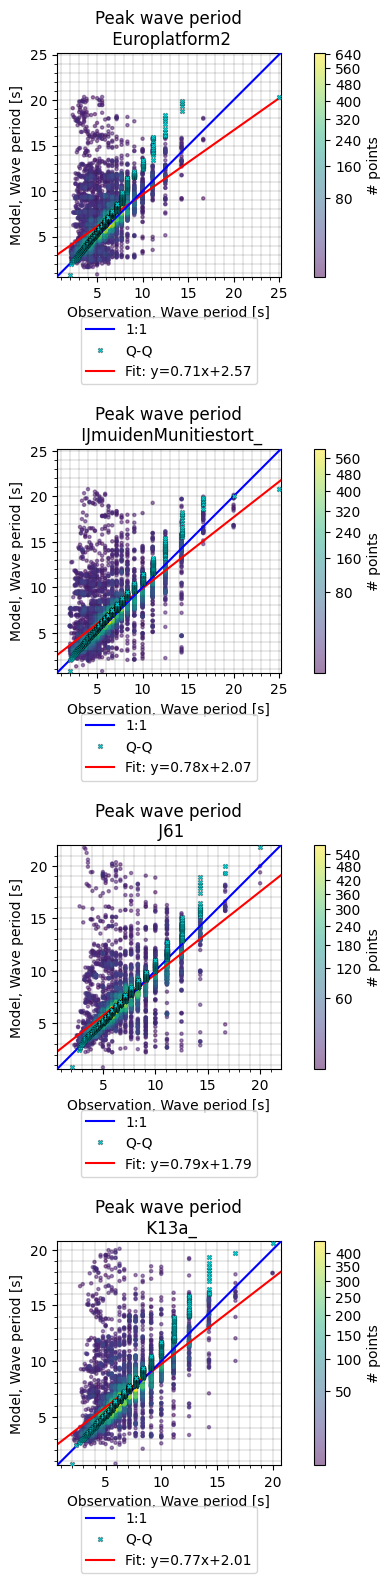

In [27]:
# Scatter plot
pl.plot_scatter_cc(cc = cc_tp, title='Peak wave period')

### Mean wave direction

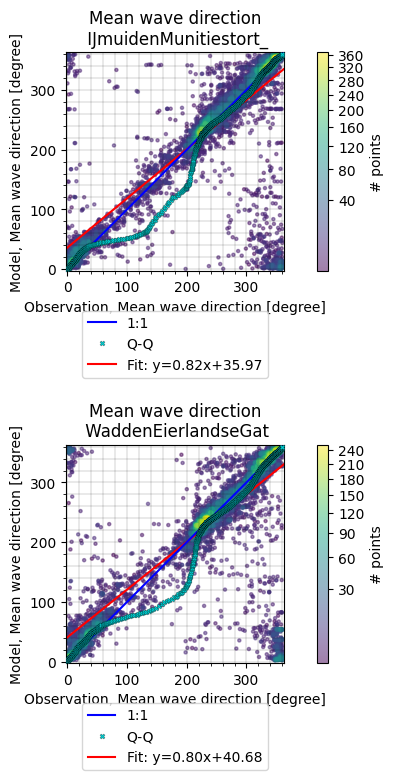

In [28]:
# Scatter plot
pl.plot_scatter_cc(cc = cc_dir, title='Mean wave direction')

## Timeseries

### Significant wave height

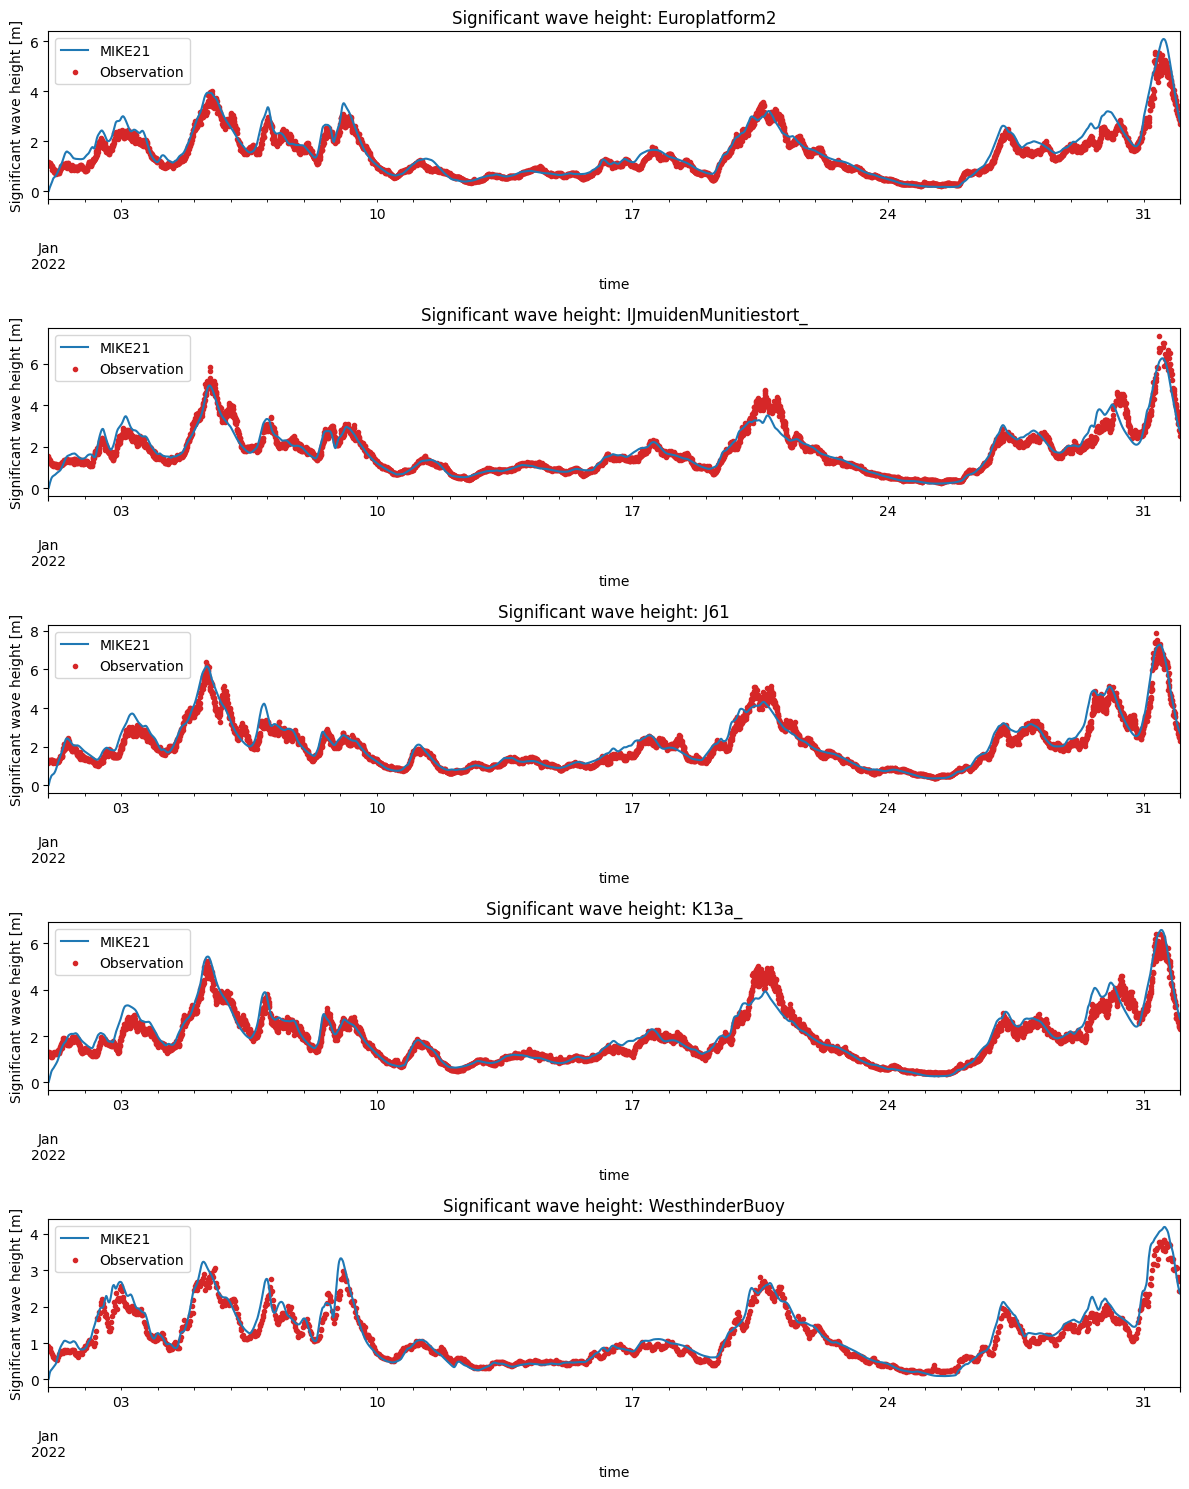

In [29]:
pl.plot_timeseries_currents(cc = cc_swh, title='Significant wave height')

### Peak wave period

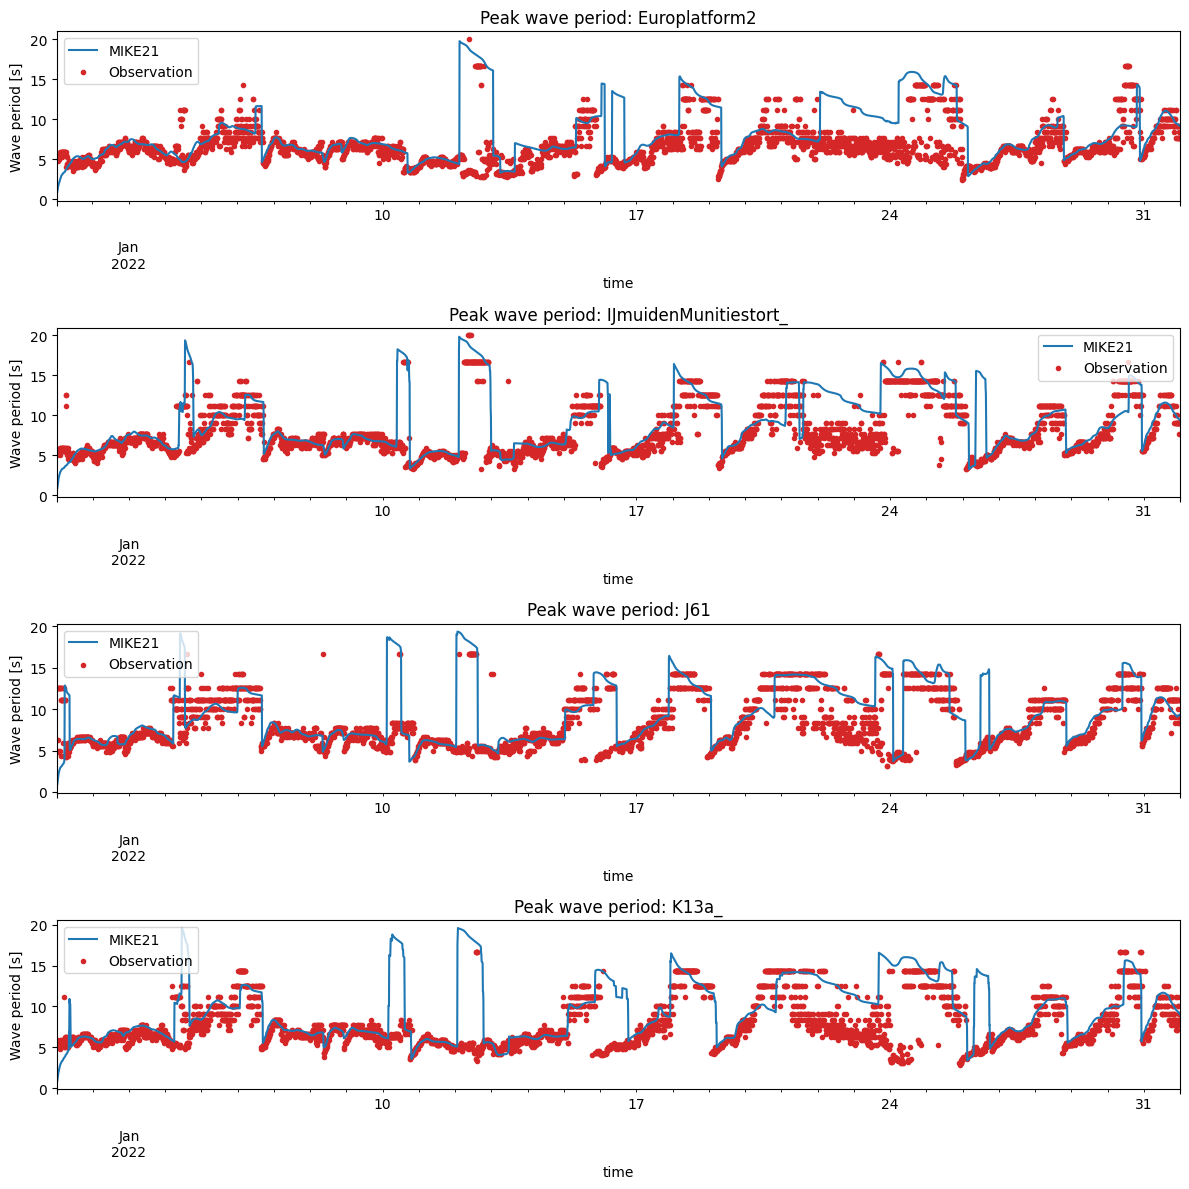

In [30]:
pl.plot_timeseries_currents(cc = cc_tp, title='Peak wave period')

### Mean wave direction

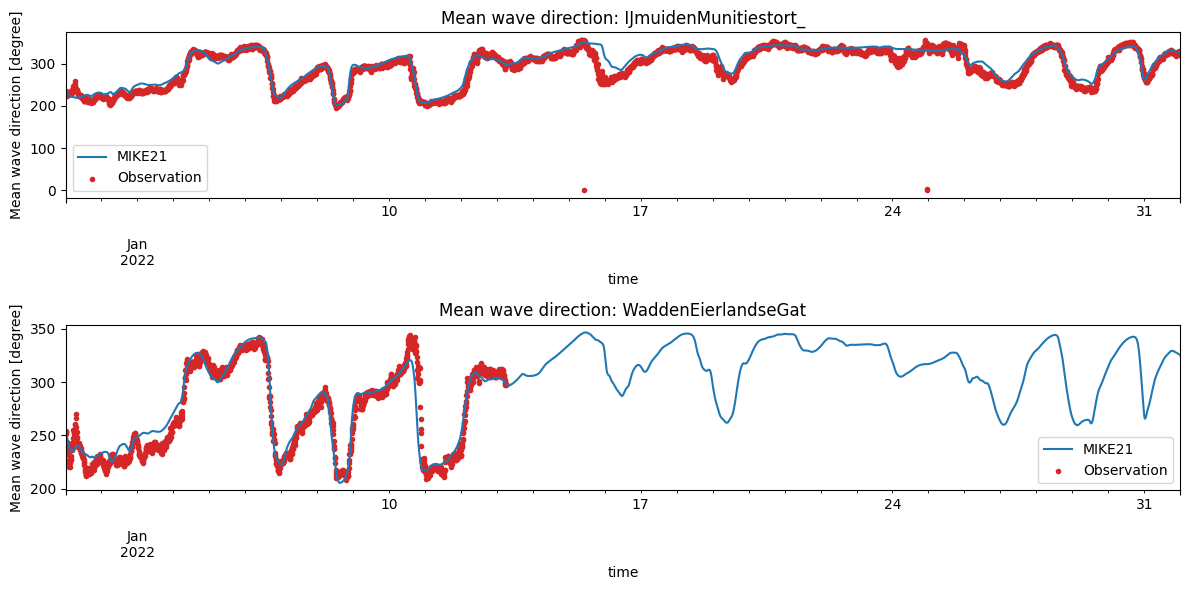

In [31]:
pl.plot_timeseries_currents(cc = cc_dir, title='Mean wave direction')